Total dataset size: 1288 samples
Number of classes (people): 7

Training the AdaBoost model...
Training complete.

Model Performance Metrics:
                   precision    recall  f1-score   support

     Ariel Sharon       0.50      0.08      0.13        13
     Colin Powell       0.71      0.57      0.63        60
  Donald Rumsfeld       0.65      0.56      0.60        27
    George W Bush       0.68      0.92      0.78       146
Gerhard Schroeder       0.55      0.48      0.51        25
      Hugo Chavez       0.71      0.33      0.45        15
       Tony Blair       0.65      0.42      0.51        36

         accuracy                           0.67       322
        macro avg       0.64      0.48      0.52       322
     weighted avg       0.66      0.67      0.64       322



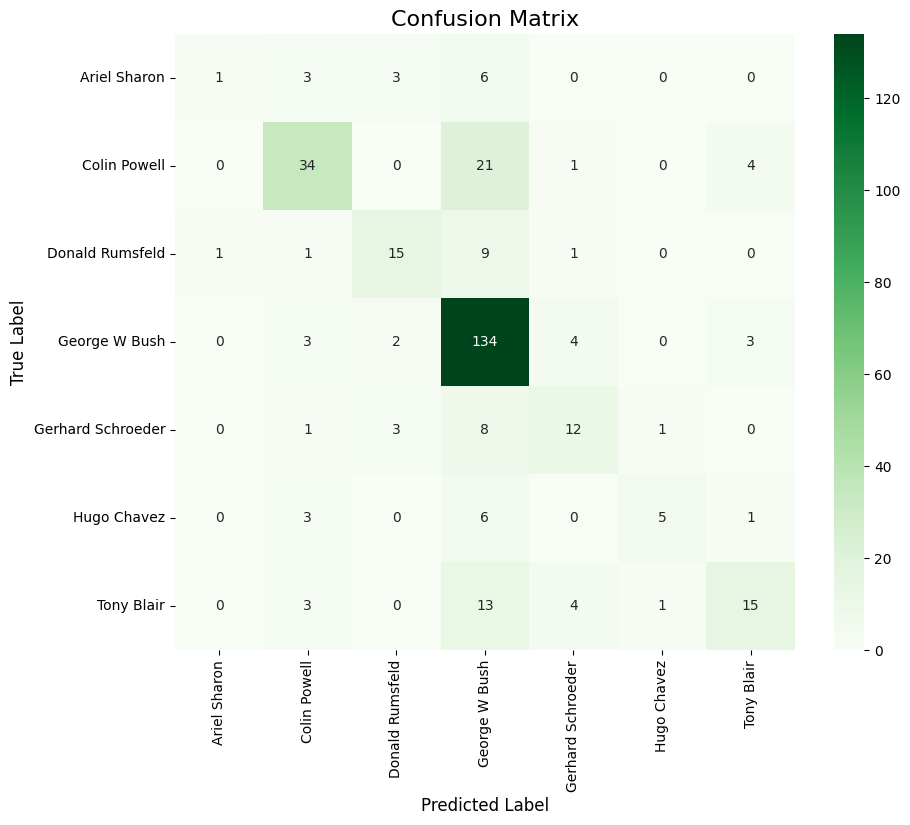

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA

# 1. Load Data (using the same dataset as before)
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X = lfw_people.data
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = len(target_names)
print(f"Total dataset size: {X.shape[0]} samples")
print(f"Number of classes (people): {n_classes}")


# 2. Preprocess with PCA (same transformation)
n_components = 150
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X)
X_pca = pca.transform(X)

# 3. Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.25, random_state=42
)

# 4. Instantiate & Train Model
# Using 'estimator' instead of the old 'base_estimator'
print("\nTraining the AdaBoost model...")
clf = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=2),
    n_estimators=300,
    learning_rate=0.8,
    random_state=42
)
clf.fit(X_train, y_train)
print("Training complete.")

# 5. Predict
y_pred = clf.predict(X_test)

# 6. Evaluate
print("\nModel Performance Metrics:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Generate and plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=range(n_classes))
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=target_names, 
            yticklabels=target_names)
plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.show()